<div style="text-align: center;">
    <img src="./images/logo_CESI.jpg" width="500">
</div>

# Livrable

## Contexte du Projet

Ce projet vise à répondre à l'appel à manifestation d'intérêt lancé par l'ADEME (Agence de l'Environnement et de la Maîtrise de l'Énergie) pour la réalisation de démonstrateurs et d'expérimentations de nouvelles solutions de mobilité durable adaptées à différents types de territoires.

L'équipe de CesiCDP, en collaboration avec plusieurs partenaires, s'est déjà intéressée à la mobilité multimodale intelligente et souhaite développer une méthode basée sur la recherche opérationnelle pour résoudre le problème de la gestion de tournées de livraison. L'objectif est de calculer une tournée optimisée sur un réseau routier reliant un sous-ensemble de villes, en minimisant la durée totale de la tournée tout en tenant compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

Le projet comporte une version de base du problème où le modèle et le code en Python doivent être développés pour résoudre des instances de taille importante. De plus, une étude statistique du comportement expérimental de l'algorithme doit être réalisée.

Dans un second temps, des contraintes supplémentaires peuvent être intégrées. Ces dernières incluent des fenêtres de temps de livraison, l'interdiction de livrer en dehors de ces fenêtres, la possibilité d'attendre sur place l'ouverture des fenêtres, l'utilisation de plusieurs camions pour effectuer les livraisons avec des contraintes de capacité et d'encombrement, des points de collecte spécifiques pour chaque objet, la variation du temps de parcours des axes en fonction du trafic, etc.

Le projet est organisé en plusieurs étapes, dont la modélisation formelle, la conception algorithmique et l'implémentation, l'étude expérimentale et la présentation des résultats à l'équipe avant la remise des livrables à l'ADEME.

Le premier livrable de modélisation contient une étude décrivant le problème, sa formalisation, les contraintes supplémentaires traitées et une analyse théorique de sa complexité.

## Membre du groupe

<div style="text-align: center;">
<img src="./images/team.png" width="1000">
</div>

# I. Modélisation

## Choix des contraintes et explication  

##### Fenêtre de temps de livraison pour chaque objet
- Interdiction de livrer hors de la fenêtre
- Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle
##### k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base. 
- Capacité des camions (2 ou 3 dimensions) et encombrement des objets 
- Certains objets ne peuvent être livrés que par certains camions

## Plan d'action 

- Reformulation du contexte 
- Calcul de propriété théorique 
- Calcul de complexité 
- Représentation formelle des données et de l'objectif (Contraintes) 
- Sources

## Contexte
L'ADEME a lancé un appel à manifestation d'intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité. CesiCDP, en collaboration avec ses partenaires, propose une solution pour optimiser les tournées de livraison.

## Description du Problème de Base
Le problème consiste à calculer une tournée de livraison sur un réseau routier reliant plusieurs villes et revenant au point de départ, en minimisant la durée totale de la tournée. Ce problème est connu sous le nom de Problème du Voyageur de Commerce (TSP).


# Vocabulaire et notion de complexité

## Définition de base

Un graphe est composé de sommets reliés par des arêtes.
Une boucle est une arête reliant un sommet à lui-même.
Deux sommets reliés par une arête sont dit adjacents 
Le degré d'un sommet est le nombre d'arêtes dont ce sommet est une extrémité.
Un sommet qui n'est adjacent à aucun autre sommet du graphe est dit isolé. C'est le cas du sommet E de notre exemple. 

<div style="text-align: center;">
<img src="./images/graph_def.png">
</div>

Un graphe orienté est un graphe dont les arêtes sont orientées. Chaque arête ne peut être parcourue que dans le sens de la flèche.
Les arêtes sont appelées arcs.

<div style="text-align: center;">
<img src="./images/graph_oriente.png">
</div>

Un graphe simple est un graphe ayant au plus une arête entre deux sommets et n’ayant pas de boucle.
Un graphe est dit complet lorsque tous ses sommets sont adjacents 


<div style="text-align: center;">
<img src="./images/graph_comp_non_comp.png">
</div>

- La somme des degrés des sommets d’un graphe non orienté est égale au double du nombre total d’arêtes.

## Chaines 

Une chaîne est une suite de sommets telle que chaque sommet est relié au suivant par une arête.
Dans une chaîne, on peut prendre plusieurs fois la même arête.
La longueur d'une chaîne est le nombre d'arêtes qui la composent.
Une chaîne est fermée lorsque l’origine et l’extrémité sont confondues.

<div style="text-align: center;">
<img src="./images/def_chaine.png">
</div>

## Cycle 

Un cycle est une chaîne  fermée (c'est-à-dire dont l'origine et l'extrémité sont identiques) dont toutes les arêtes sont distinctes.
On dit qu'un graphe est connexe si deux sommets quelconques peuvent être reliés par une chaîne.

### Cycles Eulérien 

Une chaîne est eulérienne lorsqu’elle contient chaque arête du graphe une et une seule fois.
Si cette chaîne est un cycle, il s’agit d’un cycle eulérien
Un graphe connexe contient une chaîne eulérienne si et seulement s'il possède 0 ou 2 sommets de degré impair

## Matrice d'adjacence 

### Graphe non orienté 
La matrice d’adjacence associée à un graphe non orienté d’ordre n dont les sommets sont numérotés de 1 à $n$ est la matrice carrée d’ordre $n$, où le terme situé en ligne $i$ et colonne $j$ est égal au nombre d’arêtes reliant $i$ et $j$.

La matrice d’adjacence d’un graphe non orienté est toujours symétrique par rapport à sa première diagonale.


<div style="text-align: center;">
<img src="./images/Matrice_adj_non_oriente.png">
</div>


### Graphe orienté

La matrice d’adjacence associée à un graphe orienté d’ordre $n$ dont les sommets sont numérotés de 1 à $n$ est la matrice carrée d’ordre $n$, où le terme situé en ligne $i$ et colonne $j$ est égal à 1 s’il existe une arête menant de $i$ à $j$, et à 0 sinon. Contrairement à la matrice d’adjacence d’un graphe non orienté, celle d’un graphe orienté n’est pas forcément symétrique par rapport à sa première diagonale.

<div style="text-align: center;">
<img src="./images/Matrice_adj_oriente.png">
</div>

## Complexité d'un algorithme
La complexité d'un algorithme peut être définie comme la quantité de ressources, telles que le temps d'exécution et l'espace mémoire, utilisées par cet algorithme.

- $ O(1) $ (constante): Toutes les opérations sont simples.
- $ O(log n) $: Ce sont des algorithmes très rapides. Ex : recherche dichotomique.
- $ O(n) $ (on dit linéaire): Typiquement quand on parcourt un tableau ou une liste un nombre borné de fois : recherche dans un tableau, minimum d’une liste, etc.
- $O(n log n)$: Cette complexité apparaît régulièrement lorsque l’on fait du “diviser pour régner”. Ex : tri rapide, tri fusion, tri par tas, etc.
- $O(n^2)$ (on dit quadratique). Quand on manipule des tableaux à deux dimensions, ou qu’on effectue un assez grand nombre de calculs sur un tableau à une dimension : somme de deux matrices, tri insertion, tri bulle, tri sélection, etc.


La notion de "grand O" est utilisée pour caractériser cette complexité. Elle fournit une fonction qui limite asymptotiquement, avec un facteur constant, la fonction qui représente le temps de calcul de l'algorithme en fonction de la taille de l'entrée. Par exemple, si l'on dit que l'algorithme a une complexité de $O(n²)$ dans le pire des cas, cela signifie que l'algorithme prendra au maximum un temps de l'ordre de $x * n² + y$, où x est une constante réelle. La valeur de y peut être une expression polynomiale de degré inférieur à $n²$.



## 1. Reformulation Formelle du Problème
### Variables de Décision
- \( x_{ijk} \): Indicateur binaire (1 si l'arc de la ville \( i \) à la ville \( j \) est utilisé par le camion \( k \), 0 sinon)
- \( t_i \): Temps d'arrivée à la ville \( i \)
- \( l_k \): Charge du camion \( k \)

### Fonction Objectif
Minimiser la durée totale de la tournée:
\[
\min \sum_{k=1}^{m} \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} x_{ijk}
\]
où \( c_{ij} \) est le coût (temps de trajet) entre les villes \( i \) et \( j \).

### Contraintes
1. Chaque ville doit être visitée une fois par un camion:
\[
\sum_{k=1}^{m} \sum_{j=1}^{n} x_{ijk} = 1 \quad \forall i
\]
2. Chaque camion doit quitter chaque ville qu'il visite:
\[
\sum_{j=1}^{n} x_{ijk} = \sum_{j=1}^{n} x_{jik} \quad \forall i, \forall k
\]
3. Contraintes de temps:
\[
t_i + c_{ij} - t_j \leq M (1 - x_{ijk}) \quad \forall i, j, k
\]
4. Contraintes de capacité:
\[
\sum_{i=1}^{n} d_i x_{ijk} \leq Q_k \quad \forall k
\]
5. Contraintes de fenêtres de temps:
\[
a_i \leq t_i \leq b_i \quad \forall i
\]
6. Variables binaires:
\[
x_{ijk} \in \{0, 1\}
\]


## Description des contraintes

### Contraintes de base

<div style="text-align: center;">
  <img src="./images/OIJ_graph.drawio.png "/>
</div> 

On cherche à calculer la distance minimale entre les villes, afin de minimiser le temps de trajet. On cherche donc à minimiser la fonction suivante :
$$ Coût(total) = \sum temps \ de \ parcours \ (segment) $$
$$ \sum_{i}^{}\sum_{j}^{}x_{ij}\times c_{ij} $$

$$ F(S) = \sum_{i=1}^{n-1} \text{dist}((x_{S_i}, y_{S_i}), (x_{S_{i+1}}, y_{S_{i+1}})) + \text{dist}((x_{S_n}, y_{S_n}), (x_{S_1}, y_{S_1})) $$

Dans cette expression, $S$ est une solution candidate représentée par une séquence ordonnée des indices des points d'intérêt à visiter, $ n $ est le nombre de points d'intérêt, $(x_i, y_i)$ sont les coordonnées cartésiennes du point d'intérêt d'indice $i$, et $\text{dist}((x_i, y_i), (x_j, y_j))$ représente la distance euclidienne entre les points $(x_i, y_i)$ et $(x_j, y_j)$.

Afin de calculer le temps de trajet le plus efficace, nous pouvons utiliser l'algorithme de Dijkstra. Cet algorithme permet de calculer le plus court chemin entre deux sommets d'un graphe. Il est basé sur le principe de relaxation, qui consiste à améliorer progressivement une estimation de la distance d'un sommet à la source. L'algorithme de Dijkstra est un algorithme glouton, c'est-à-dire qu'il choisit à chaque étape le sommet qui a la distance la plus faible parmi les sommets non visités. Il est nécessaire de parcourir tous les sommets du graphe pour trouver le plus court chemin entre deux sommets.
Cependant, le rapport entre le temps d'exécution et la taille du graphe est de $O(n²)$, ce qui est trop long pour des graphes de grande taille. Il est donc nécessaire d'utiliser d'autres manières de trouver cet optimal : les heuristiques.

#### On ne peut livrer le client 2 avant de livrer le client 1 

<div style="text-align: center;">
  <img src="./images/OIJ_graph.drawio.png" />
</div>



Nous allons poser notre point de départ au point O. Il s'agit tout d'abord de s'assurer que le camion part du dépôt. On pose donc un booléen pour savoir si le camion s'est déplacé. La valeur est de 0 si le camion n'a pas parcouru l'arête et 1 si l'arrête est parcourue. 

Soit : $ \sum^{}x_{oi} =1 $
et  $ \sum^{}x_{oj} =1 $



$t_i + c_{ij} - N(1 - x_{ij}) \leq t_j$

Avec $t_i$ le temps de passage au sommet $i$, $c_{ij}$ le temps de parcours entre les sommets $i$ et $j$, $N$ une constante suffisamment grande et $x_{ij}$ un booléen valant 1 si le sommet $j$ est visité après le sommet $i$ et 0 sinon.
Cette équation permet de s'assurer que le sommet $j$ n'est visité qu'après le sommet $i$. En effet, si $x_{ij}$ vaut 0, alors $N(1 - x_{ij})$ vaut $N$ et l'équation devient $t_i + c_{ij} - N \leq t_j$. Comme N est une constante suffisamment grande, cette équation est toujours vérifiée. Si $x_{ij}$ vaut 1, alors $N(1 - x_{ij})$ vaut 0 et l'équation devient $t_i + c_{ij} \leq t_j$, ce qui est équivalent à $t_i + c_{ij} - t_j \leq 0$. Cette équation est vérifiée si le sommet $j$ est visité après le sommet $i$.

#### Puisque nous sommes dans un cycle hamiltonien, notre problème ne peut pas contenir de boucle :

En posant la même base que le problème précédent, on sait que nous ne pouvons passer deux fois au même endroit de sorte que : 

<div style="text-align: center;">
  <img src="./images/Not_boucle.png" />
</div>

De ce fait, on pose : $ \sum^{}x_{ii} = 0 $ 




### Contraintes Supplémentaires
#### 1. Interdiction de livrer hors de la fenêtre

Une des contraintes supplémentaires du problème de gestion de tournées de livraison concerne l'interdiction de livrer en dehors d'une fenêtre de temps spécifiée pour chaque client. Cette contrainte vise à garantir que les livraisons sont effectuées pendant des plages horaires prédéterminées et ne peuvent pas être réalisées en dehors de ces intervalles.

Pour exprimer correctement cette contrainte, nous devons tenir compte de deux aspects :

1. Le temps de livraison doit commencer après le début de la fenêtre de temps du client.
2. Le temps de livraison ne doit pas dépasser la fin de la fenêtre de temps du client.

Nous pouvons représenter cette contrainte en associant à chaque client un intervalle de temps pendant lequel la livraison peut être effectuée. 

Soit $t_i^{\text{début}}$ et $t_i^{\text{fin}}$ les instants de début et de fin de la fenêtre de temps du client $i$ respectivement et $L_i$, l'heure à laquelle la livraison $i$ est effectuée. Pour chaque client, le temps de livraison est calculé en tenant compte du temps de trajet depuis la livraison précédente, ainsi que du temps nécessaire pour remettre le colis.

Supposons que nous ayons déjà calculé le temps de livraison jusqu'au client précédent $j$ et notons ce temps $T_j$. Le temps de livraison au client actuel $i$ peut être exprimé comme suit :

$$
\forall L_i: \ t_{\text{début},i} \leq T_j + \text{temps de trajet}(j, i) + \text{temps de remise du colis} \leq t_{\text{fin},i}
$$

Cette contrainte garantit que l'heure de livraison de chaque objet se situe dans la plage spécifiée par la fenêtre de temps correspondante. Si une livraison est effectuée avant l'heure de début ou après l'heure de fin de sa fenêtre de temps, la contrainte sera violée.

L'introduction de cette contrainte peut rendre la résolution du problème plus complexe, car il faut prendre en compte les fenêtres de temps lors de la planification des tournées de livraison. Cela va nécessiter des ajustements dans l'algorithme utilisé pour trouver le chemin le plus court. Des considérations supplémentaires doivent être prises en compte pour s'assurer que les livraisons sont effectuées dans les plages horaires spécifiées, ce qui peut influencer la sélection des chemins optimaux.

#### 2. k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.

Une des autres contraintes supplémentaires de notre problème de gestion de tournées de livraison concerne l’ajout de plusieurs camions permettant d’effectuer en même temps les livraisons.

Cette contrainte contient également plusieurs aspects à prendre en compte :
* Le calcul de la tournée devra inclure l’affectation des objets aux différents camions disponibles
* Minimiser non plus le temps total, mais la date de retour du dernier camion à la base

Soit $n$ le nombre d’objets à livrer, $k$ le nombre de camions disponibles simultanément et $W$ la capacité maximale de chaque camion.
Nous avons donc comme variables de décision les suivantes :
* $x[i,j]$ : variable binaire indiquant si l’objet $i$ est affecté au camion $j$ ($x[i,j]=1$) ou non ($x[i,j]=0$).

Les contraintes sont les suivantes :
1.	Chaque objet doit être affecté à un seul camion :<br/>
<br/>

$\sum_{j=1}^{k}x[i,j]=1$, $\forall j \in {1, 2, …, k}$
 
2.	Chaque camion ne peut pas dépasser sa capacité maximale :<br/>
<br/>

$\sum_{i=1}^{n}w[i] \cdots x[i,j] \leq W$, $\forall j \in {1, 2, …, k}$

3.	Les contraintes de fenêtre de temps : Si l’objet $i$ est affecté au camion $j$, il doit être livré dans la fenêtre de temps définie pour ce camion : <br/>
<br/>
$t_{départ ,j}$ $+$ temps de trajet $(j)$ $\leq$ heure de début de livraison $(i)$ $\leq$ heure de fin de livraison $(i)$ $\leq$ $t_{retour, j}$

Où $t_{départ ,j}$ est l’heure de départ du camion $j$, temps de trajet $(j)$ est le temps de trajet nécessaire pour atteindre l’objet $i$, heure de début de livraison $(i)$ est l’heure de début de la fenêtre de temps de l’objet $i$, heure de fin de livraison $(i)$ est l’heure de fin de la fenêtre de temps de l’objet $i$ et $t_{retour, j}$ est l’heure de retour du camion $j$ à la base.

L’objectif consiste à minimiser la date de retour du dernier camion à la base. Cela peut être formulé comme suit :

4.	Objectif : Minimiser la date de retour du dernier camion à la base :
<br/>
<br/>
Minimiser $max_{j}$ $t_{retour, j}$



### Analyse supplémentaire des contraintes non implémentée

Nous avons décidé d'analyser tout de même les contraintes que nous n'implémenterons pas.

#### Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic

Différentes variations de temps découlent de cette contrainte :

- Les aléas de la circulation (tels que les accidents, les travaux, les embouteillages...) peuvent augmenter le temps de trajet d'un segment. Ces variations peuvent se calculer par la multiplication du temps de trajet par un coefficient de variation :
 
$temps_{variation} = temps_{trajet} * coefficient_{variation}$

$temps_{variation}$ représente le temps de trajet avec les aléas de la circulation

$temps_{trajet}$ représente le temps de trajet sans les aléas de la circulation

$coefficient_{variation}$ représente le coefficient de variation du temps de trajet, qui dépend des aléas de la circulation

Exemple : Si le temps de trajet entre deux villes est de 10 minutes et que le coefficient de variation est de 1.5 à cause d'un accident, alors le temps de trajet sera de 15 minutes.
Ces éléments sont majoritairement aléatoires, mais certains peuvent être prévus à l'avance, comme les travaux ou les bouchons à certaines horaires dans certains secteurs (comme autour d'une grande ville). Il est donc possible de les prendre en compte dans le calcul du temps de trajet.

- La météo peut également influencer le temps de trajet. Par exemple, si le temps est pluvieux, le temps de trajet peut être augmenté de 10% par rapport à un temps sec. On peut donc calculer le temps de trajet en multipliant le temps de trajet par un coefficient de variation : 

$temps_{variation} = temps_{trajet} * coefficient_{variation}$

$temps_{variation}$ représente le temps de trajet avec la météo

$temps_{trajet}$ représente le temps de trajet sans la météo

$coefficient_{variation}$ représente le coefficient de variation du temps de trajet, qui dépend de la météo

Ceci est similaire à la variation du temps de trajet due à la circulation, mais le coefficient de variation est différent.

- La limitation de vitesse en fonction du type de route. Par exemple, sur une autoroute, la vitesse maximale est de 130 km/h, alors que sur une route nationale, la vitesse maximale est de 80 km/h. On peut donc calculer le temps de trajet en divisant la distance par la vitesse maximale autorisée : 

$temps_{trajet} = distance / vitesse_{max}$

$temps_{trajet}$ représente le temps de trajet sur un segment

$distance$ représente la distance entre deux villes

$vitesse_{max}$ représente la vitesse maximale autorisée sur la route

#### Chaque objet a un point de collecte spécifique

Modélisation du problème :

Variables de décision du programme :

$S_{supp}$ : nombre de sommets supplémentaires

$t_{supp}$ : temps supplémentaire, dû à la période de chargement

$t_{tournée}$ : temps total de la tournée

Contraintes du programme :
Chaque objet a un point de collecte spécifique

Fonction économique

• Ajout du nombre de points de collecte au nombre total d’arrêt :
$S_{total}$ + $S_{supp}$ 

• Ajout de temps à la durée totale de la tournée dû au temps nécessaire au chargement des objets
$t_{total}$ + $t_{supp}$ = $t_{tournée}$


### 2. Propriétés Théoriques du Problème
Nous cherchons à démontrer que le Problème du Voyeageur de commerce (TSP) appartient à la classe des problèmes NP-complets. Cette démonstration se fait en deux étapes : premièrement, en montrant que le TSP est dans NP, et deuxièmement, en prouvant qu'il est NP-difficile.

La différence entre un problème NP-complet et NP-difficile réside dans le fait que prouver la solvabilité dans NP-complet équivaut à prouver la solvabilité dans NP-difficile.

<div style="text-align: center;">
    <img src="./images/NPcomplet.png">
</div>


Pour établir que le TSP est dans NP, nous devons vérifier que la solution peut être obtenue en temps polynomial (c'est-à-dire que le nombre d'opérations nécessaires est proportionnel à la taille de la solution candidate 
𝑂
(
𝑛
2
)
O(n 
2
 )) et qu'elle peut être vérifiée par un certificat.

Dans ce contexte, le temps polynomial est caractérisé par la présence d'un cycle passant par chaque sommet et d'un coût inférieur à une valeur 
𝑘
k.



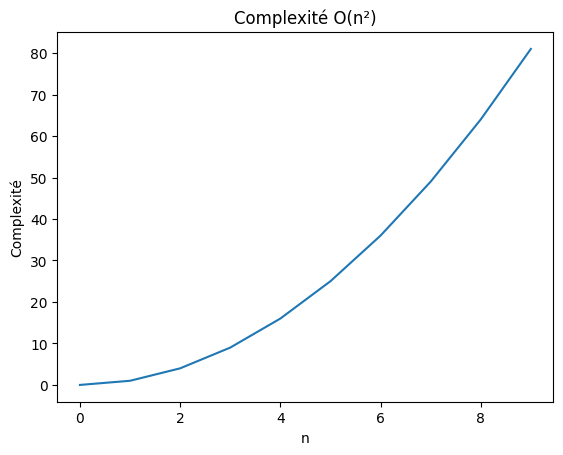

In [6]:
import matplotlib.pyplot as plt

def plot_linear_complexity(n):
    x = range(n)
    y = [i**2 for i in x]
    
    plt.plot(x, y)
    plt.xlabel('n')
    plt.ylabel('Complexité')
    plt.title('Complexité O(n²)')
    plt.show()

# Exemple d'utilisation avec n = 10
plot_linear_complexity(10)


Cette complexité est quadratique. On utilise les $n$ sommets formant un cycle, puis le coût de ce cycle (la somme du coût de chacune des arêtes du composant).

Pour le problème de la gestion de tournées de livraison, le certificat peut être une séquence ordonnée de villes représentant l'ordre des livraisons. Pour vérifier si cette séquence est correcte, nous pouvons parcourir la séquence en vérifiant que chaque ville est reliée à la précédente par une arête valide.


La complexité temporelle est un terme utilisé pour décrire l'évolution du temps de calcul en fonction de la taille du problème.
### Preuve de l'appartenance à NP-Complet

### a. Montrer que le TSP est dans NP

Pour prouver que le problème du Voyageur de Commerce (TSP) est dans NP, nous devons démontrer qu'il est possible de vérifier en temps polynomial si une solution donnée est correcte.

**Définition du problème :**
- **Entrée** : Un graphe complet \($ G = (V, E) $\) avec une fonction de coût positive \($ C : V \times V \rightarrow \mathbb{N} $\) et un entier \($ k $\).
- **Question** : Existe-t-il un cycle passant par chaque sommet exactement une fois (cycle hamiltonien) et ayant un coût total inférieur ou égal à \($ k $\) ?

**Certificat :**
- Un certificat pour le TSP est une séquence de sommets représentant un cycle. Par exemple, pour un graphe avec 5 sommets, un certificat pourrait être \($[2, 5, 1, 3, 4]$\).

**Vérification du certificat :**
1. **Critère 1 :** Le cycle passe par chaque sommet exactement une fois.
   - Pour vérifier cela, nous parcourons la séquence du certificat et nous nous assurons que chaque sommet apparaît exactement une fois. Cela peut être fait en temps \($ O(n^2) $\) où \($ n $\) est le nombre de sommets.
2. **Critère 2 :** Le coût total du cycle est inférieur ou égal à \($ k $\).
   - Pour vérifier cela, nous calculons la somme des coûts des arêtes dans le cycle proposé. En utilisant une matrice de coûts, cette opération peut être effectuée en temps \($ O(n) $\).

Comme ces vérifications peuvent être effectuées en temps polynomial, le TSP est dans NP.

### b. Réduction polynomiale à partir du problème du cycle Hamiltonien

Pour montrer que le TSP est NP-complet, nous devons montrer qu'un problème déjà connu comme NP-complet peut être réduit au TSP en temps polynomial. Nous allons utiliser le problème du cycle Hamiltonien pour cette réduction.

**Définition du problème du cycle Hamiltonien :**
- **Entrée** : Un graphe \($ G = (V, E) $\).
- **Question** : Existe-t-il un cycle passant par chaque sommet exactement une fois (cycle hamiltonien) ?

**Transformation du problème du cycle Hamiltonien en TSP :**
- Soit une instance \($ I = (G) $\) du problème du cycle Hamiltonien.
- Nous transformons cette instance en une instance \( I' \) du TSP de la manière suivante :
  - Nous fixons \($ k = |V| $\).
  - Nous construisons un graphe complet \($ K = (V, V \times V) $\) avec une fonction de coût \($ C $\) définie comme suit :
    - \($ C(u, v) = 1 $\) si \($ (u, v) \in E $\).
    - \($ C(u, v) = 2 $\) si \($ (u, v) \notin E $\).

**Vérification de la réduction :**
- Si le graphe \($ G $\) a un cycle Hamiltonien, alors dans le graphe \($ K $\), il y a un cycle de coût \($ |V| $\) utilisant uniquement les arêtes de coût 1.
- Si le graphe \($ G $\) n'a pas de cycle Hamiltonien, alors tout cycle dans \($ K $\) aura au moins une arête de coût 2, rendant le coût total strictement supérieur à \($ |V| $\).

Cette réduction se fait en temps polynomial, car :
- Copier le graphe \($ G $\) et ajouter les arêtes supplémentaires prend \($ O(|V|^2) $\).
- Construire la fonction de coût \($ C $\) prend \($ O(|V|^2) $\).


En suivant ces étapes, nous avons montré que :
1. Le TSP est dans NP, car il est possible de vérifier un certificat en temps polynomial.
2. Le problème du cycle Hamiltonien peut être réduit au TSP en temps polynomial.

Ainsi, le problème du TSP est NP-complet.

### c. Prouver que le TSP est NP-difficile

Pour montrer que le TSP est NP-difficile, nous devons démontrer qu'il est au moins aussi difficile que tout autre problème dans NP. Nous allons le faire en montrant qu'une instance du TSP peut être utilisée pour résoudre le VRP (Vehicle Routing Problem), qui est un problème également connu pour être difficile.

#### Transformation du TSP en VRP

Soit \($ T $\) une instance du TSP avec un ensemble de \($ n $\) villes. Nous supposons que \($ T $\) a une solution optimale qui forme un cycle hamiltonien de coût minimum. Nous construisons une instance \($ V $\) du VRP en utilisant les mêmes \($ n $\) villes que dans \($ T $\). Chaque ville dans \($ V $\) représente un point de livraison.

#### Définition des paramètres du VRP

- **Ensembles :**
  - \($ V $\) : ensemble des \($ n $\) villes (points de livraison).
  - \($ D $\) : ensemble des dépôts (un seul dépôt central).
  - \($ C $\) : ensemble des véhicules disponibles pour la livraison.

- **Coûts :**
  - Coût des arcs : Chaque arc \($ (u, v) $\) dans \($ V $\) a un coût égal à la distance entre les villes correspondantes dans \($ T $\).
  - Coût des véhicules : Chaque véhicule dans \($ C $\) a une capacité et une contrainte de temps suffisamment grandes pour permettre la visite de toutes les villes.

#### Vérification de la réduction

- Si nous pouvons résoudre le VRP pour l'instance \($ V $\), alors nous pouvons obtenir une solution au TSP pour l'instance \($ T $\).
- Supposons que nous ayons une solution optimale pour le VRP qui consiste en un ensemble de tournées de véhicules. Chaque tournée de véhicule visite un sous-ensemble de villes de \($ V $\) dans un ordre spécifique.
- En regroupant les sous-ensembles de villes visitées dans l'ordre de visite des tournées de véhicules, nous obtenons une séquence ordonnée de toutes les villes, formant un cycle qui passe une fois par toutes les villes de \($ T $\) et revient à son point de départ. Le coût total de ce cycle correspond à la distance totale parcourue dans le VRP.

Ainsi, si l'on résout le TSP dans \($ T $\), on peut réduire polynomialement pour résoudre le VRP.



La transformation se fait en temps polynomial, car nous avons effectué les opérations suivantes :
  - Copié le graphe et ajouté des arêtes en un maximum de \($ O(|V|^2) $\) opérations.
  - Construit la fonction de coût en \($ O(|V|^2) $\) opérations.
Enfin, notre problème étant au moins aussi difficile que le cycle Hamiltonien (qui est NP-complet), cela signifie que notre problème est également NP-complet et donc NP-difficile.

## 3. Méthode de Résolution Choisie
### Introduction aux Métaheuristiques
Les métaheuristiques sont des approches d'optimisation qui fournissent des solutions approximatives à des problèmes complexes en un temps raisonnable. Nous avons choisi d'utiliser la Métaheuristique des Fourmis (ACO) et le Recuit Simulé (Simulated Annealing) pour résoudre le VRPTW.

### Métaheuristique des Fourmis (ACO)
L'une des méthodes de résolution de ce problème est l'utilisation de l'algorithme des colonies de fourmis (ACO). L'algorithme ACO utilise des fourmis artificielles pour explorer l’espace. Chaque fois qu'une fourmi passe sur une arête, elle laisse des phéromones sur celle-ci. En admettant que les fourmis privilégient le chemin avec le plus de phéromone, on peut construire progressivement le chemin le plus optimal en observant le taux de phéromone sur les arêtes du graphe.

Nous avons choisi d'utiliser dans un premier temps cette métaheuristique pour résoudre le problème du VRP en raison de sa capacité à trouver des solutions proches de l'optimum global avec un temps d'exécution acceptable. De plus, cette métaheuristique nous permet également de résoudre les contraintes supplémentaires que nous ajouterons dans une version complémentaire.

### Recuit Simulé (Simulated Annealing)
Dans un second temps, pour affiner notre résultat, nous avons choisi de coupler cette métaheuristique avec celle du recuit simulé (SA). Cette métaheuristique permet, elle aussi, d'approximer l'optimum global d'une fonction. De plus, celle-ci a un temps d'exécution nettement plus faible que la métaheuristique ACO, mais donne une solution moins optimale. C'est pour cela que nous l'utiliserons pour affiner le résultat obtenu par l'algorithme des colonies de fourmi.

SA se base sur la notion de recuit en métallurgie. Dans le recuit simulé, un processus de recherche commence avec un état d’énergie élevée (une solution initiale) et abaisse progressivement la température (un paramètre de contrôle) jusqu’à ce qu’il atteigne un état d’énergie minimale (la solution optimale).

## Approche pour modéliser la fenêtre de temps 

Pour modéliser les fenêtres de temps dans le problème du VRPTW, nous devons intégrer les contraintes temporelles de livraison dans notre modèle. Les fenêtres de temps spécifient un intervalle durant lequel chaque livraison doit être effectuée.

Les instances de Solomon, qui sont couramment utilisées pour benchmarker les algorithmes VRPTW, définissent ces fenêtres de temps pour chaque point de livraison. Chaque point $i$ a une fenêtre de temps [$a_i, b_i$], où $a_i$ est le début de la fenêtre et $b_i$ est la fin. Si un camion arrive avant $a_i$, il doit attendre jusqu'à $a_i$. Si un camion arrive après $b_i$, la livraison est considérée comme impossible.

### Intégration des Fenêtres de Temps
Pour intégrer cette contrainte, nous ajoutons les conditions suivantes dans notre modèle :

#### Respect des Fenêtres de Temps :
$a_i ≤t_i ≤b_i$ $∀i$

où $t_i$ est le temps d'arrivée à la ville $i$.

#### Possibilité d'Attendre :
Si un camion arrive avant $a_i$, il doit attendre jusqu'à $a_i$. Cela peut être modélisé en ajustant le temps de parcours pour inclure les périodes d'attente nécessaires.

### Algorithme d'Intégration
Lors de la construction de la solution, l'algorithme vérifie les fenêtres de temps pour chaque ville. Si une solution propose une arrivée en dehors de la fenêtre, cette solution est pénalisée ou rejetée. Ainsi, les solutions valides respectent toujours les fenêtres de temps.

Cette approche permet de s'assurer que chaque livraison est effectuée dans l'intervalle de temps spécifié, améliorant ainsi la pertinence et la faisabilité des solutions trouvées.

## Approche pour modéliser la livraison 

Pour modéliser la livraison dans le problème du VRP, on utilisera la capacité des camions pour déterminer le nombre de camions nécessaires pour effectuer la tournée. On effectue un premier l'algorithme (Ant) pour effectuer un premier trajet. Ensuite, les villes sont regroupées en sous-ensembles (clusters) en fonction de la capacité maximale des camions, en veillant à ce que la somme des livraisons nécessaires dans chaque ville ne dépasse pas la capacité maximale du camion. Chacun de ses clusters représentera un camion et une tournée.

Sur chacun de ses clusters, nous exécutons la métaheuristique du recuit, nous permettant d'optimiser encore plus chaque livraison, puisque cet algorithme à de meilleur temps d'exécution malgré ses résultats moins optimaux. Il est ainsi utilisé pour déterminer la séquence optimale de livraison pour chaque camion. En sachant que nous utilisons cet métaheuristique sur un trajet déjà produit avec ACO, le résultat de la tournée tend vers l'optimal.

# II. Implémentation